# Aribnb Data Analysis: Seattle and Boston
## Udacity Data Scientist Nanodegree Project 1

## Section 1: Project Introduction

### As a person who loves to travel, one thing that is always important to keep track of is the price of accommodations. As an aspiring Data Scientist and someone that loves to see how much information can be extracted from data, I found a way to combine these two areas: traveling and data,  into a small project.
### I analysed the prices of renting places at Airbnb in two US cities, Seattle and Boston, to answer four basic questions:

## Questions:

### - Q1: What is the price variation throughout the year for each city? Which months are the most expensive to rent a room?
### - Q2: The prices behave in the say manner in both cities?
### - Q3: Which city is more expensive (higher average price): Boston or Seattle?
### - Q4: Can the price be predicted using the data provided?


In [26]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from statistics import mean

## Section 2: Understanding the data

### Seattle Airbnb Data

In [2]:
sea_cal = pd.read_csv('./Data/Airbnb/Seattle/calendar.csv')

In [3]:
sea_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
def avg_price_month(df):
    '''
    Info:
        This function performs transformations on the dataframe to obtain the average price for each month
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
    -----------
    Output:
        df_pr_month : Dataframe with the average price for each month (type: pandas Dataframe)
    '''
    
    # Creating a dataset with only the registers that have a price
    df_pr = df[df['available'] == 't']
    
    # Obtaining the month and year of each date and saving it as a new feature
    df_pr['month'] = df_pr['date'].apply(lambda z: z.split('-')[1])
    
    # Droping the id and avaiable columns and changing the type of the price column to float
    df_pr = df_pr.drop(columns = ['listing_id', 'available'])
    df_pr['price'] = df_pr['price'].apply(lambda x: x.replace('$', '')).apply(lambda y: y.replace(',', '')).astype(float)
    
    # Obtaining the average price for each month
    df_pr_month = df_pr.groupby(['month']).mean()
    
    # Renaiming the index
    df_pr_month.rename(index={'01': 'Januray', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
                              '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', 
                              '12': 'December'},
                       columns={'price': 'Price (U$)'},
                       inplace = True)
    
    return df_pr_month

In [5]:
# Cleaning the data
sea_cal_pr_month = avg_price_month(sea_cal)
sea_cal_pr_month

,Price (U$)
month,
Januray,122.912176
February,124.293927
March,128.644488
April,135.097005
May,139.538183
June,147.473137
July,152.094150
August,150.656594
September,143.255949


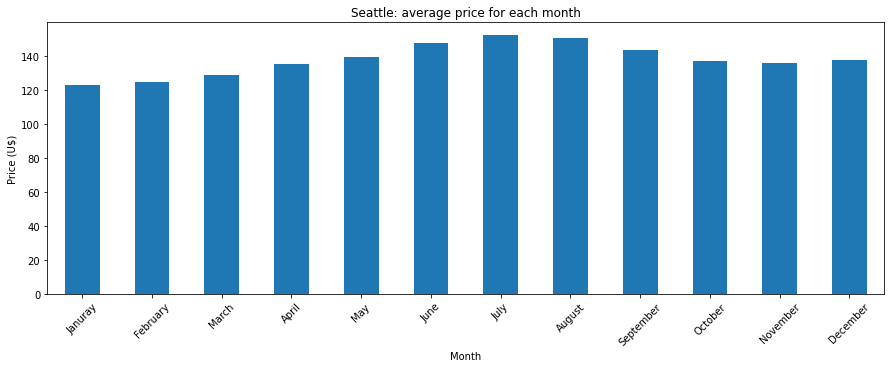

In [6]:
# Plotting the prices throughout the year
sea_cal_pr_month.plot.bar(rot=45, figsize = [15,5], title = 'Seattle: average price for each month', ylabel = 'Price (U$)', xlabel = 'Month', legend = False);

### Boston Airbnb Data

In [7]:
bos_cal = pd.read_csv('./Data/Airbnb/Boston/calendar.csv')

In [8]:
bos_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
# Cleaning the data
bos_cal_pr_month = avg_price_month(bos_cal)
bos_cal_pr_month

,Price (U$)
month,
Januray,182.799671
February,180.961028
March,181.818742
April,197.252890
May,193.712295
June,196.535302
July,202.486309
August,203.330142
September,237.047727


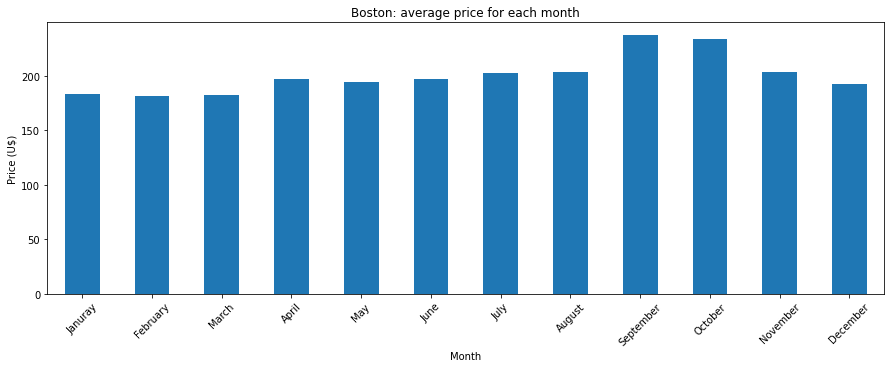

In [10]:
bos_cal_pr_month.plot.bar(rot=45, figsize = [15,5], title = 'Boston: average price for each month', ylabel = 'Price (U$)', xlabel = 'Month', legend = False);

## Answer to Q1:

### For Seattle, the prices begin to rise when summer is approaching (June, July and August), reaching maximum value  in July. It makes sense because a lot of people usually travel in their summer vacation. 
### After the summer, the prices tend to reduce. 

### For Boston, autumn is the season where the city receives more tourists, causing prices to rise. The months of September and August have considerably higher prices compared to the rest of the year.



## Question 2: The prices behave in the say manner in both cities?

## Answer to Q2:

### This other graph shows us that the tourism rates in both cities behave differently. While in Seattle the prices tend to rise in June, July and August, it's clear that for Boston the months where the prices for renting  are higher are September and October. 

## Question 3: Wich city is more expensive (higher avarege price): Boston or Seattle?

In [11]:
# Creating a single dataset with the prices for each city
bos_compare = bos_cal_pr_month.rename(columns = {'Price (U$)': 'Boston'})
sea_compare = sea_cal_pr_month.rename(columns = {'Price (U$)': 'Seattle'})

#Generating the graph comparing the prices in the two cities
df_compare = pd.concat([bos_compare, sea_compare], axis=1)

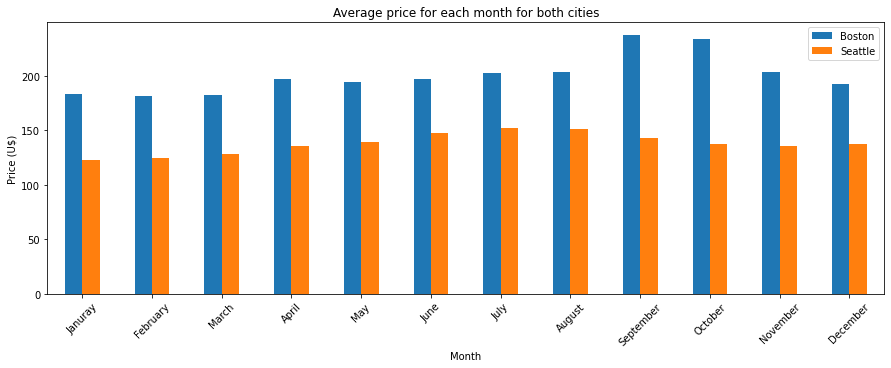

In [12]:
df_compare.plot.bar(rot=45, figsize = [15,5], title = 'Average price for each month for both cities', ylabel = 'Price (U$)', xlabel = 'Month', legend = True);

## Answer to Q3:

### The graph clearly shows that the prices for renting a room in Airbnb in Boston are higher throughout the year.

## Question 4: Can the price be predicted using the data provided?

### To answer this question we will perform three analysis:

- Using only the Seattle data
- Using only the Boston data
- Using both the Seattle and Boston data

### Seattle data

In [13]:
sea_list = pd.read_csv('./Data/Airbnb/Seattle/listings.csv')
sea_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
sea_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Boston data

In [15]:
bos_list = pd.read_csv('./Data/Airbnb/Boston/listings.csv')
bos_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [16]:
bos_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### A first look into the data show us that:
- Some features (like the url or the ID of the review) don't aggregate information to predict a value
- Some informations (like square_feet) have too much null values

These columns will be discarded. Both datasets will have the same columns for the analysis

In [17]:
desired_columns = [
    'summary',
    'space', 
    'description',  
    'neighborhood_overview', 
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'neighbourhood_group_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'security_deposit',
    'cleaning_fee',
    'guests_included',
    'extra_people',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'cancellation_policy',
    'price'
]

### Analysis 1: Predicting the price using only the Settle data

In [18]:
df_list_sea = sea_list[desired_columns]
df_list_sea.head()

,summary,space,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,100%,Queen Anne,Apartment,Entire home/apt,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,$85.00
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",within an hour,98%,100%,Queen Anne,Apartment,Entire home/apt,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$150.00
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,within a few hours,67%,100%,Queen Anne,House,Entire home/apt,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$975.00
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,Queen Anne,Apartment,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,$100.00
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,within an hour,100%,NaN,Queen Anne,House,Entire home/apt,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,$450.00


In [19]:
df_list_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       3641 non-null   object 
 1   space                         3249 non-null   object 
 2   description                   3818 non-null   object 
 3   neighborhood_overview         2786 non-null   object 
 4   host_response_time            3295 non-null   object 
 5   host_response_rate            3295 non-null   object 
 6   host_acceptance_rate          3045 non-null   object 
 7   neighbourhood_group_cleansed  3818 non-null   object 
 8   property_type                 3817 non-null   object 
 9   room_type                     3818 non-null   object 
 10  accommodates                  3818 non-null   int64  
 11  bathrooms                     3802 non-null   float64
 12  bedrooms                      3812 non-null   float64
 13  bed

### Working with categorical features

In [20]:
def string_op(df, columns_list):
    '''
    Info:
        This function performs string operations to change the values in the columns passed to float
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        columns_list: Names of the columns to be transformed (type: list)
    -----------
    Output:
        df : Dataframe after the transformations (type: pandas Dataframe)
    '''
    
    # Removing unwanted characters and changing the values to numbers
    df_new = df.copy()
    for col in columns_list:
        df_new[col] = df_new[col].str.replace('%', '')
        df_new[col] = df_new[col].str.replace('$', '')
        df_new[col] = df_new[col].str.replace(',', '').astype(float)
    
    return df_new

def check_for_values(df, features_names):
    '''
    Info:
        This function replaces the values in the features_names column with 0 (if null) or 1 
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        feature_name: Names of the columns to be transformed (type: list)
    -----------
    Output:
        df : Dataframe after the transformations (type: pandas Dataframe)
    '''
    for feature in features_names:
        df[feature].loc[~df[feature].isnull()] = 1
        df[feature].loc[df[feature].isnull()] = 0 
        df[feature] = df[feature].astype(int)
        
    return df
     
def transf_categorical(df, column_names):
    '''
    Info:
        This function creates categorical columns with boolean columns for each possible value for each feature and drops the
        original column from the dataframe
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        column_names: Names of the columns to be transformed (type: list)
    -----------
    Output:
        df: Dataframe after the addition of the new columns and removal of the old ones (type: pandas Dataframe)
    '''
    for col in column_names:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        except:
            continue
        
    df.columns.str.replace(' ','_')

    return df


def get_amenities(df, num_amenities):
    '''
    Info:
        This function creates new columns with information provided in the amenities column
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        num_amenities: The amount of amenities desired to be added to the dataframe
    -----------
    Output:
        df_f: Dataframe with the new columns (type: pandas Dataframe)
    '''
    
    df['amenities'] = df['amenities'].str.replace('{','')
    df['amenities'] = df['amenities'].str.replace('}','')
    list_amenities = []
    
    # Getting all the possible values
    for amenities in df['amenities']:
        aux = amenities.split(',')

        # Save each item in the list
        for element in aux:
            list_amenities.append(element.replace('"', ''))

    # Using only the 10 most common items
    C = Counter(list_amenities).most_common(num_amenities)
    set_amenities = []
    for c in C:
        set_amenities.append(c[0])
    
    # Creating and filling the columns for each item, according to the items present in the amenities column
    items_list = []
    for row in df['amenities']:
        row_amenities = row.replace('"', '').split(',')

        items_dict = {}
        for elem in set_amenities:
            if elem in row_amenities:
                items_dict[elem] = 1
            else:
                items_dict[elem] = 0
        items_list.append(items_dict)
    
    df_am = pd.DataFrame(data = items_list)
    df_f = pd.concat([df, df_am], axis=1)
    df_f = df_f.drop(columns = ['amenities'])
    
    return df_f

In [21]:
# Columns to check if the host provided the information
columns_check = [
    'summary',
    'space',
    'description',
    'neighborhood_overview',
    'security_deposit',
    'cleaning_fee',
    'extra_people'
]

# Categorical columns to be treated
columns_cat = [
    'host_response_time',
    'neighbourhood_group_cleansed',
    'property_type',
    'room_type',
    'bed_type',
    'cancellation_policy'
]

# Rates and price columns need to be transformed
columns_str = [
    'host_response_rate',
    'host_acceptance_rate',
    'price'
]

In [22]:
# Changing the rates and price from string to float
df_list_sea_str = string_op(df_list_sea, columns_str)

# Dealing with the categorical data
df_cat_check_sea = check_for_values(df_list_sea_str,columns_check)
df_cat_sea = transf_categorical(df_cat_check_sea, columns_cat)
df_final_sea = get_amenities(df_cat_sea, 10)

In [23]:
df_final_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 75 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   summary                                           3818 non-null   int32  
 1   space                                             3818 non-null   int32  
 2   description                                       3818 non-null   int32  
 3   neighborhood_overview                             3818 non-null   int32  
 4   host_response_rate                                3295 non-null   float64
 5   host_acceptance_rate                              3045 non-null   float64
 6   accommodates                                      3818 non-null   int64  
 7   bathrooms                                         3802 non-null   float64
 8   bedrooms                                          3812 non-null   float64
 9   beds               

### Finally, the remaining null values will be dealt with. One set will remove the null values and another set will substitute the null values with the mean of the column.

In [24]:
# Removing the rows with null values
df_final_sea_1 = df_final_sea.dropna()
df_final_sea_1

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Wireless Internet,Heating,Kitchen,Smoke Detector,Essentials,Dryer,Washer,Internet,Shampoo,TV
0,0,1,1,0,96.0,100.0,4,1.0,1.0,1.0,...,1,1,1,0,0,1,1,1,0,1
1,1,1,1,1,98.0,100.0,4,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,67.0,100.0,11,4.5,5.0,7.0,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,1,1,0,1,1,0,0,0,1,0
7,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,1,1,1,1,100.0,100.0,5,1.0,2.0,3.0,...,1,1,1,1,1,1,1,1,1,1
3811,1,1,1,1,100.0,100.0,3,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
3812,1,1,1,1,100.0,100.0,4,1.0,1.0,2.0,...,1,1,1,1,1,1,1,1,1,0
3813,1,1,1,1,99.0,100.0,6,2.0,3.0,3.0,...,1,1,1,1,1,1,1,1,1,1


A lot of data was lost removing the null values, let's see how this impact on the development of the model.

In [25]:
# Replacing the null values with the mean 
df_final_sea_2 = df_final_sea.copy()
num_vars = df_final_sea_2.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_final_sea_2[col].fillna((df_final_sea_2[col].mean()), inplace=True)
    
df_final_sea_2

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Wireless Internet,Heating,Kitchen,Smoke Detector,Essentials,Dryer,Washer,Internet,Shampoo,TV
0,0,1,1,0,96.000000,100.000000,4,1.0,1.0,1.0,...,1,1,1,0,0,1,1,1,0,1
1,1,1,1,1,98.000000,100.000000,4,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,67.000000,100.000000,11,4.5,5.0,7.0,...,1,1,1,1,1,1,1,1,1,1
3,1,0,1,0,94.886798,99.967159,3,1.0,0.0,2.0,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,100.000000,99.967159,6,2.0,3.0,3.0,...,1,1,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,1,1,1,99.000000,100.000000,6,2.0,3.0,3.0,...,1,1,1,1,1,1,1,1,1,1
3814,1,1,1,1,100.000000,100.000000,4,1.0,1.0,2.0,...,1,1,1,1,1,0,0,1,1,1
3815,1,0,1,0,94.886798,99.967159,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,0,0,0
3816,1,1,1,1,100.000000,99.967159,2,1.0,0.0,1.0,...,1,1,1,1,1,0,0,0,0,1


### Model Development

In [39]:
def regression(X,y):
    '''
    Info:
        This function creates and trains a Regression model and use it to predict the prices
    -----------
    Input:
        X: Dataframe containing the features (type: pandas Dataframe)
        y: Series containing the labels (type: pandas Series)
    -----------
    Output:
        train_score: R² score of the model using the train set (type: float)
        test_score: R² score of the model using the test set (type: float)
    '''
    
    # Splittin the data into training and test sets (70% train and 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    # Creating the Regression model
    clf = RandomForestRegressor()
    
    # Training the model with the train data
    clf.fit(X_train, y_train)
    
    # Predicting the values using the train and test sets
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    
    # Obtaining the R² score
    test_score = r2_score(y_test, y_test_pred)
    train_score = r2_score(y_train, y_train_pred)
    
    return train_score, test_score

In [40]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y1 = df_final_sea_1['price'].values
X1 = df_final_sea_1.drop(columns = ['price'])

# Dataset with mean replacing null values
y2 = df_final_sea_2['price'].values
X2 = df_final_sea_2.drop(columns = ['price'])

# Making the model and obtaining the results
train_score1, test_score1 = regression(X1,y1)
train_score2, test_score2 = regression(X2,y2)

print(f'Train score dropping the null values: {train_score1}\nTest score dropping the null values: {test_score1}')
print(f'Train score replacing the null values: {train_score2}\nTest score replacing the null values: {test_score2}')

Train score dropping the null values: 0.9504418407435578
Test score dropping the null values: 0.5867762586132053
Train score replacing the null values: 0.9376647405382912
Test score replacing the null values: 0.5963435777298145


In [41]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y1 = df_final_sea_1['price'].values
X1 = df_final_sea_1.drop(columns = ['price'])

# Dataset with mean replacing null values
y2 = df_final_sea_2['price'].values
X2 = df_final_sea_2.drop(columns = ['price'])

# Making the model and obtaining the results
train_score1, test_score1 = regression2(X1,y1)
train_score2, test_score2 = regression2(X2,y2)

print(f'Train score dropping the null values: {train_score1}\nTest score dropping the null values: {test_score1}')
print(f'Train score replacing the null values: {train_score2}\nTest score replacing the null values: {test_score2}')

Train score dropping the null values: 0.9518511265908686
Test score dropping the null values: 0.5868013560507029
Train score replacing the null values: 0.9376350295948119
Test score replacing the null values: 0.5881871053724792


### Analysis 2: Predicting the price using only the Boston data

In [42]:
df_list_bos = bos_list[desired_columns]
df_list_bos.head()

,summary,space,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
0,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,NaN,NaN,NaN,House,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,$250.00
1,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...",within an hour,100%,100%,NaN,Apartment,Private room,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,$65.00
2,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,within a few hours,100%,88%,NaN,Apartment,Private room,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,moderate,$65.00
3,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,within a few hours,100%,50%,NaN,House,Private room,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,$75.00
4,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",within an hour,100%,100%,NaN,House,Private room,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,flexible,$79.00


In [43]:
df_list_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       3442 non-null   object 
 1   space                         2528 non-null   object 
 2   description                   3585 non-null   object 
 3   neighborhood_overview         2170 non-null   object 
 4   host_response_time            3114 non-null   object 
 5   host_response_rate            3114 non-null   object 
 6   host_acceptance_rate          3114 non-null   object 
 7   neighbourhood_group_cleansed  0 non-null      float64
 8   property_type                 3582 non-null   object 
 9   room_type                     3585 non-null   object 
 10  accommodates                  3585 non-null   int64  
 11  bathrooms                     3571 non-null   float64
 12  bedrooms                      3575 non-null   float64
 13  bed

In [44]:
# Changing the rates and price from string to float
df_list_bos_str = string_op(df_list_bos, columns_str)

# Dealing with the categorical data
df_cat_check_bos = check_for_values(df_list_bos_str,columns_check)
df_cat_bos = transf_categorical(df_cat_check_bos, columns_cat)
df_final_bos = get_amenities(df_cat_bos, 10)

In [45]:
df_final_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   summary                                3585 non-null   int32  
 1   space                                  3585 non-null   int32  
 2   description                            3585 non-null   int32  
 3   neighborhood_overview                  3585 non-null   int32  
 4   host_response_rate                     3114 non-null   float64
 5   host_acceptance_rate                   3114 non-null   float64
 6   accommodates                           3585 non-null   int64  
 7   bathrooms                              3571 non-null   float64
 8   bedrooms                               3575 non-null   float64
 9   beds                                   3576 non-null   float64
 10  security_deposit                       3585 non-null   int32  
 11  clea

### Dealing with the null values

In [46]:
# Removing the rows with null values
df_final_bos_1 = df_final_bos.dropna()
df_final_bos_1

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Wireless Internet,Heating,Kitchen,Essentials,Smoke Detector,Air Conditioning,TV,Internet,Dryer,Washer
1,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,100.0,88.0,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,100.0,50.0,4,1.0,1.0,2.0,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,100.0,100.0,2,1.5,1.0,2.0,...,1,1,1,1,1,1,0,1,0,0
5,1,1,1,1,100.0,95.0,2,1.0,1.0,1.0,...,1,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,1,0,1,1,100.0,100.0,1,1.0,1.0,1.0,...,1,1,1,1,1,0,0,0,1,1
3575,1,0,1,0,96.0,100.0,2,1.0,1.0,1.0,...,1,1,1,1,1,1,0,1,0,0
3578,1,1,1,1,100.0,100.0,1,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,0,0
3580,1,0,1,0,96.0,100.0,3,1.0,1.0,1.0,...,1,1,1,1,1,1,0,1,0,0


In [47]:
# Replacing the null values with the mean 
df_final_bos_2 = df_final_bos.copy()
num_vars = df_final_bos_2.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_final_bos_2[col].fillna((df_final_bos_2[col].mean()), inplace=True)
    
df_final_bos_2

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Wireless Internet,Heating,Kitchen,Essentials,Smoke Detector,Air Conditioning,TV,Internet,Dryer,Washer
0,1,1,1,1,94.989082,84.173089,4,1.5,2.0,3.0,...,1,1,1,1,1,0,1,0,1,1
1,1,1,1,1,100.000000,100.000000,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,100.000000,88.000000,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,100.000000,50.000000,4,1.0,1.0,2.0,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,100.000000,100.000000,2,1.5,1.0,2.0,...,1,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,1,0,1,0,96.000000,100.000000,3,1.0,1.0,1.0,...,1,1,1,1,1,1,0,1,0,0
3581,1,1,1,0,10.000000,83.000000,2,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
3582,1,1,1,1,78.000000,50.000000,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3583,1,0,1,0,100.000000,96.000000,2,1.0,1.0,1.0,...,0,0,1,1,0,0,0,0,1,1


In [48]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y3 = df_final_bos_1['price']
X3 = df_final_bos_1.drop(['price'], axis= 1)

# Dataset with mean replacing null values
y4 = df_final_bos_2['price']
X4 = df_final_bos_2.drop(['price'], axis= 1)

# Making the model and obtaining the results
train_score3, test_score3 = regression(X3,y3)
train_score4, test_score4 = regression(X4,y4)

print(f'Train score dropping the null values: {train_score3}\nTest score dropping the null values: {test_score3}')
print(f'Train score replacing the null values: {train_score4}\nTest score replacing the null values: {test_score4}')

Train score dropping the null values: 0.9488217524167222
Test score dropping the null values: 0.6066756034047052
Train score replacing the null values: 0.894643004542408
Test score replacing the null values: 0.11737033600682767


### Analysis 3: Predicting the price using the data from Seattle and Boston

In [50]:
df_unified = pd.concat([df_list_sea, df_list_bos], axis = 0, ignore_index = True)
df_unified.head()

,summary,space,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,100%,Queen Anne,Apartment,Entire home/apt,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,$85.00
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",within an hour,98%,100%,Queen Anne,Apartment,Entire home/apt,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$150.00
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,within a few hours,67%,100%,Queen Anne,House,Entire home/apt,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$975.00
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,Queen Anne,Apartment,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,$100.00
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,within an hour,100%,NaN,Queen Anne,House,Entire home/apt,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,$450.00


In [51]:
df_list_sea.head()

,summary,space,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,100%,Queen Anne,Apartment,Entire home/apt,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,$85.00
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",within an hour,98%,100%,Queen Anne,Apartment,Entire home/apt,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$150.00
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,within a few hours,67%,100%,Queen Anne,House,Entire home/apt,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$975.00
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,Queen Anne,Apartment,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,$100.00
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,within an hour,100%,NaN,Queen Anne,House,Entire home/apt,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,$450.00


In [52]:
# Changing the rates and price from string to float
df_unified_str = string_op(df_unified, columns_str)

# Dealing with the categorical data
df_unified_cat_check = check_for_values(df_unified_str,columns_check)
df_unified_cat = transf_categorical(df_unified_cat_check, columns_cat)
df_unified_final = get_amenities(df_unified_cat, 20)

In [53]:
df_unified_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   summary                                           7403 non-null   int32  
 1   space                                             7403 non-null   int32  
 2   description                                       7403 non-null   int32  
 3   neighborhood_overview                             7403 non-null   int32  
 4   host_response_rate                                6409 non-null   float64
 5   host_acceptance_rate                              6159 non-null   float64
 6   accommodates                                      7403 non-null   int64  
 7   bathrooms                                         7373 non-null   float64
 8   bedrooms                                          7387 non-null   float64
 9   beds               

### Dealing with the null values

In [54]:
# Removing the rows with null values
df_unified_final_1 = df_unified_final.dropna()
df_unified_final_1

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Carbon Monoxide Detector,Family/Kid Friendly,Fire Extinguisher,Air Conditioning,Cable TV,Free Parking on Premises,Hangers,First Aid Kit,Hair Dryer,Laptop Friendly Workspace
0,0,1,1,0,96.0,100.0,4,1.0,1.0,1.0,...,0,1,0,1,1,0,0,0,0,0
1,1,1,1,1,98.0,100.0,4,1.0,1.0,1.0,...,1,1,1,0,0,1,0,1,0,0
2,1,1,1,1,67.0,100.0,11,4.5,5.0,7.0,...,1,1,0,1,1,1,0,0,0,0
6,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
7,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,1,0,1,1,100.0,100.0,1,1.0,1.0,1.0,...,1,1,0,0,0,1,1,0,1,1
7393,1,0,1,0,96.0,100.0,2,1.0,1.0,1.0,...,1,1,1,1,0,1,1,1,1,1
7396,1,1,1,1,100.0,100.0,1,1.0,1.0,1.0,...,1,0,1,1,0,0,1,0,1,1
7398,1,0,1,0,96.0,100.0,3,1.0,1.0,1.0,...,1,1,1,1,0,1,1,0,1,1


In [55]:
# Replacing the null values with the mean 
df_unified_final_2 = df_unified_final.copy()
num_vars = df_unified_final_2.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_unified_final_2[col].fillna((df_unified_final_2[col].mean()), inplace=True)
    
df_unified_final_2

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,Carbon Monoxide Detector,Family/Kid Friendly,Fire Extinguisher,Air Conditioning,Cable TV,Free Parking on Premises,Hangers,First Aid Kit,Hair Dryer,Laptop Friendly Workspace
0,0,1,1,0,96.000000,100.000000,4,1.0,1.0,1.0,...,0,1,0,1,1,0,0,0,0,0
1,1,1,1,1,98.000000,100.000000,4,1.0,1.0,1.0,...,1,1,1,0,0,1,0,1,0,0
2,1,1,1,1,67.000000,100.000000,11,4.5,5.0,7.0,...,1,1,0,1,1,1,0,0,0,0
3,1,0,1,0,94.936496,91.981653,3,1.0,0.0,2.0,...,1,1,1,0,0,0,0,0,0,0
4,1,1,1,1,100.000000,91.981653,6,2.0,3.0,3.0,...,1,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,1,0,1,0,96.000000,100.000000,3,1.0,1.0,1.0,...,1,1,1,1,0,1,1,0,1,1
7399,1,1,1,0,10.000000,83.000000,2,1.0,1.0,1.0,...,1,1,1,1,0,1,1,0,1,1
7400,1,1,1,1,78.000000,50.000000,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7401,1,0,1,0,100.000000,96.000000,2,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0


In [58]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y5 = df_unified_final_1['price']
X5 = df_unified_final_1.drop(['price'], axis= 1)

# Dataset with mean replacing null values
y6 = df_unified_final_2['price']
X6 = df_unified_final_2.drop(['price'], axis= 1)

# Making the model and obtaining the results
train_score5, test_score5 = regression(X5,y5)
train_score6, test_score6 = regression(X6,y6)

print(f'Train score dropping the null values: {train_score5}\nTest score dropping the null values: {test_score5}')
print(f'Train score replacing the null values: {train_score6}\nTest score replacing the null values: {test_score6}')

Train score dropping the null values: 0.9511931202184346
Test score dropping the null values: 0.640531557955474
Train score replacing the null values: 0.8995964621263391
Test score replacing the null values: 0.46678072079929767


## Results

### The best result was obtained when using the Seattle and Boston data combined. 
### A possible reason for this could be because the amount of data in the listings dataset is considerably small, with less than 4000 registers for each city and with a lot of variations present (neighborhoods, types of accomodations, etc), so more data can increase the performance of the model.

### A way to get around the overfitting problem, is using cross-validation techniques. For this project, I used the K-Fold method, wich divides the data into training and testing sets K times and, for each time, the model is trained and tested using different data. The value chosen for K was 5.

### Using K-Fold

In [63]:
def regression2(X,y):
    '''
    Info:
        This function creates and trains a Regression model and use it to predict the prices. This function uses the
        K-Fold cross-validation to 
    -----------
    Input:
        X: Dataframe containing the features (type: pandas Dataframe)
        y: Series containing the labels (type: pandas Series)
    -----------
    Output:
        train_score: R² score of the model using the train set (type: float)
        test_score: R² score of the model using the test set (type: float)
    '''
    
    # List of scores (K-Fold)
    scores_train = []    
    scores_test = []    
    

    # Creating the Regression model
    clf = RandomForestRegressor()
    
    # Using the K-Fold Cross Validation
    for k in range(1,5, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        # Training the models
        clf.fit(X_train, y_train)
        
        # Predicting the values using the train and test sets
        y_test_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)

        # Obtaining the R² score
        test_score = r2_score(y_test, y_test_pred)
        train_score = r2_score(y_train, y_train_pred)
        
        scores_train.append(train_score)
        scores_test.append(test_score)
        
    train_score = mean(scores_train)
    test_score = mean(scores_test)
    
    return train_score, test_score

### Analysis 1

In [64]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y1 = df_final_sea_1['price'].values
X1 = df_final_sea_1.drop(columns = ['price'])

# Dataset with mean replacing null values
y2 = df_final_sea_2['price'].values
X2 = df_final_sea_2.drop(columns = ['price'])

# Making the model and obtaining the results
train_score1, test_score1 = regression2(X1,y1)
train_score2, test_score2 = regression2(X2,y2)

print(f'Train score dropping the null values: {train_score1}\nTest score dropping the null values: {test_score1}')
print(f'Train score replacing the null values: {train_score2}\nTest score replacing the null values: {test_score2}')

Train score dropping the null values: 0.9514644722241298
Test score dropping the null values: 0.5950318957884154
Train score replacing the null values: 0.9387556422571308
Test score replacing the null values: 0.5854924094522598


### Analysis 2

In [65]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y3 = df_final_bos_1['price']
X3 = df_final_bos_1.drop(['price'], axis= 1)

# Dataset with mean replacing null values
y4 = df_final_bos_2['price']
X4 = df_final_bos_2.drop(['price'], axis= 1)

# Making the model and obtaining the results
train_score3, test_score3 = regression2(X3,y3)
train_score4, test_score4 = regression2(X4,y4)

print(f'Train score dropping the null values: {train_score3}\nTest score dropping the null values: {test_score3}')
print(f'Train score replacing the null values: {train_score4}\nTest score replacing the null values: {test_score4}')

Train score dropping the null values: 0.9492832754020234
Test score dropping the null values: 0.5982807931978924
Train score replacing the null values: 0.9030413033578211
Test score replacing the null values: 0.10350460468972467


### Analysis 3

In [66]:
# Separating the features from the labels for each dataset

# Dataset with null values removed
y5 = df_unified_final_1['price']
X5 = df_unified_final_1.drop(['price'], axis= 1)

# Dataset with mean replacing null values
y6 = df_unified_final_2['price']
X6 = df_unified_final_2.drop(['price'], axis= 1)

# Making the model and obtaining the results
train_score5, test_score5 = regression2(X5,y5)
train_score6, test_score6 = regression2(X6,y6)

print(f'Train score dropping the null values: {train_score5}\nTest score dropping the null values: {test_score5}')
print(f'Train score replacing the null values: {train_score6}\nTest score replacing the null values: {test_score6}')

Train score dropping the null values: 0.9510289607342823
Test score dropping the null values: 0.6470841963606723
Train score replacing the null values: 0.8944534001941052
Test score replacing the null values: 0.48349717380093266


## Conclusion

### For this project, for all the analysis that were made, removing the null values showed to be a better alternative than to simply replacing the missing values with the mean of the column.
### Even after the use of K-Fold cross-validation method, the model still performed poorly when dealing with new data. This could be because the amount of data used was insufficient to make the model capable of interpreting correctly the way the data present in the database.
### A possible solution would be to increase the amount of data present in the database, allowing a greater amount of samples for the model development.
### Also, differente features that were not analysed could prove to be important variables in the prediction of the prices by the model.
### There are a lot of different models that perform regression. In this project only the Random Forest Regressor was tested. Maybe another model, using the same data, can deliver a better result than the one obtained here.